In [32]:
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras.preprocessing.image as p

Found 200 images belonging to 2 classes.


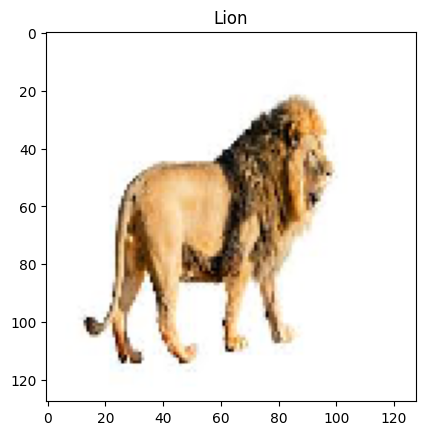

In [33]:
y_dict = {0:'Lion',1:'Tiger'}

img_gen = p.ImageDataGenerator(rescale= 1./255.)
imgs = img_gen.flow_from_directory('./img_data/',target_size=(128,128))
x_train,y_train=imgs.next()

plt.imshow(x_train[0])
plt.title(y_dict[y_train[0].argmax()])
plt.show()

In [34]:
import torch
from torch.nn import functional as F

x = torch.FloatTensor(x_train.reshape(32,3,128,128))
y = torch.FloatTensor(y_train)

In [35]:
class CNN(torch.nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = torch.nn.Conv2d(
            in_channels=3,
            out_channels=16,
            kernel_size=5,
            stride=1
        )
        self.conv2 = torch.nn.Conv2d(
            in_channels=16,
            out_channels=4,
            kernel_size=5,
            stride=1
        )
        self.maxpool1 = torch.nn.MaxPool2d(
            kernel_size=2
        )
        self.lr1 = torch.nn.Linear(
            in_features=4*60*60,
            out_features=10
        )
        self.lr2 = torch.nn.Linear(
            in_features=10,
            out_features=2
        )
        self.softmax1 = torch.nn.Softmax(
            dim=1
        )
    def forward(self, x):
        # (3,128,128)
        x = F.relu(self.conv1(x))
        # (32,124,124)
        x = F.relu(self.conv2(x))
        # (16,120,120)
        x = self.maxpool1(x)
        # (16,60,60)
        x = x.view(-1,4*60*60)
        # (16,60,60)
        x = F.relu(self.lr1(x))
        x = self.lr2(x)
        x = self.softmax1(x)
        return x

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
model = CNN()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-3)

for epoch in range(40):
    optimizer.zero_grad()
    hx = model(x)
    cost = loss_fn(hx,y)
    cost.backward()
    optimizer.step()
    pred=hx.argmax(dim=1).detach().numpy()
    actual = y.detach().numpy().argmax(axis=1)
    print(f'epoch => {epoch} / cost => {cost.item()} / acc => {accuracy_score(actual,pred)}')

epoch => 0 / cost => 0.6853700876235962 / acc => 0.5625
epoch => 1 / cost => 0.7046716213226318 / acc => 0.5625
epoch => 2 / cost => 0.6824551820755005 / acc => 0.5625
epoch => 3 / cost => 0.6831166744232178 / acc => 0.5625
epoch => 4 / cost => 0.6787997484207153 / acc => 0.5625
epoch => 5 / cost => 0.6711340546607971 / acc => 0.5625
epoch => 6 / cost => 0.6600205302238464 / acc => 0.5625
epoch => 7 / cost => 0.6475356817245483 / acc => 0.5625
epoch => 8 / cost => 0.6299830079078674 / acc => 0.5625
epoch => 9 / cost => 0.6095559597015381 / acc => 0.5625
epoch => 10 / cost => 0.5791493654251099 / acc => 0.71875
epoch => 11 / cost => 0.5269132852554321 / acc => 0.84375
epoch => 12 / cost => 0.5166435837745667 / acc => 0.84375
epoch => 13 / cost => 0.46354061365127563 / acc => 0.875
epoch => 14 / cost => 0.4517017602920532 / acc => 0.875
epoch => 15 / cost => 0.4082849323749542 / acc => 0.9375
epoch => 16 / cost => 0.3890509009361267 / acc => 0.96875
epoch => 17 / cost => 0.34703677892684

Text(0.5, 1.0, 'Lion')

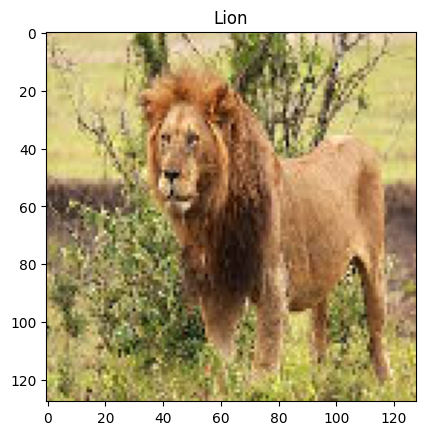

In [41]:
pred=model.forward(torch.FloatTensor(x_train[3].reshape(3,128,128)))
plt.imshow(x_train[3])
plt.title(y_dict[pred.argmax(dim=1).detach().numpy()[0]])

In [40]:
y_dict[pred.argmax(dim=1).detach().numpy()[0]]

'Lion'